In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv('judge.csv')
#drop last row and display
data.drop(data.tail(1).index,inplace=True)
data.head()

,Rk,Gcar,Gtm,Date,Tm,Unnamed: 5,Opp,Rslt,Inngs,PA,...,OPS,BOP,aLI,WPA,acLI,cWPA,RE24,DFS(DK),DFS(FD),Pos
0,1.0,573.0,1,Apr 8,NYY,NaN,BOS,W6-5,CG(11),5,...,1.000,2.0,1.20,-0.002,1.17,0.00%,-0.19,10.0,12.2,RF
1,2.0,574.0,2,Apr 9,NYY,NaN,BOS,W4-2,CG,4,...,0.708,2.0,1.01,0.006,1.02,0.00%,-0.12,4.0,6.2,CF RF
2,3.0,575.0,3,Apr 10,NYY,NaN,BOS,L3-4,CG,5,...,0.742,3.0,1.86,-0.041,1.89,-0.03%,0.41,11.0,12.0,RF
3,4.0,576.0,4,Apr 11,NYY,NaN,TOR,L0-3,CG,4,...,0.646,3.0,1.26,-0.038,1.31,-0.02%,-0.28,2.0,3.0,RF
4,5.0,577.0,5,Apr 12,NYY,NaN,TOR,W4-0,CG,4,...,0.668,2.0,0.55,-0.037,0.55,-0.02%,0.50,5.0,6.0,CF RF


Text(0.5, 1.0, 'Aaron Judge 2022 RE24')

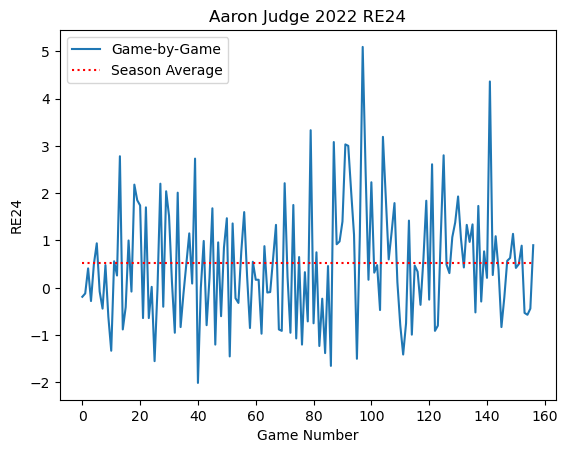

In [7]:
series = data['RE24']
avg = np.mean(series)
npts = len(series)
plt.plot(series)
plt.xlabel('Game Number')
plt.ylabel('RE24')
plt.plot([i for i in range(npts)],[avg for i in range(npts)],color='red',linestyle='dotted')
plt.legend(['Game-by-Game','Season Average'])
plt.title('Aaron Judge 2022 RE24')

Now lets use the moving average model and use an FIR filter with constant weights over the last 8 games. 

Text(0, 0.5, 'RE24')

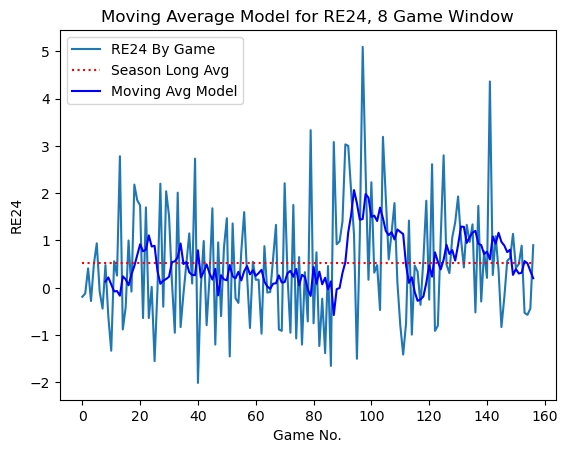

In [24]:
ma_model_8 = [0 for i in range(8,len(series))]
for i in range(8,len(series)):
    mean_est = np.mean(series[0:i])
    residuals = series[i-7:i]-mean_est
    moving_mean = np.mean(residuals)
    ma_model_8[i-8] = mean_est + moving_mean

plt.plot(series)
plt.plot([i for i in range(npts)],[avg for i in range(npts)],color='red',linestyle='dotted')
plt.plot(range(8,len(series)),ma_model_8,color='blue')
plt.title('Moving Average Model for RE24, 8 Game Window')
plt.legend(['RE24 By Game','Season Long Avg','Moving Avg Model'])
plt.xlabel('Game No.')
plt.ylabel('RE24')

Now let's try using a 5 game window and a 15 game window

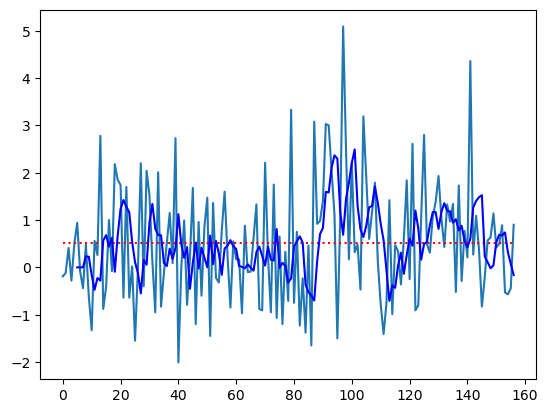

In [14]:
ma_model_5 = [0 for i in range(5,len(series))]
for i in range(8,len(series)):
    mean_est = np.mean(series[0:i])
    residuals = series[i-4:i]-mean_est
    moving_mean = np.mean(residuals)
    ma_model_5[i-5] = mean_est + moving_mean

plt.plot(series)
plt.plot([i for i in range(npts)],[avg for i in range(npts)],color='red',linestyle='dotted')
plt.plot(range(5,len(series)),ma_model_5,color='blue')

Text(0, 0.5, 'RE24')

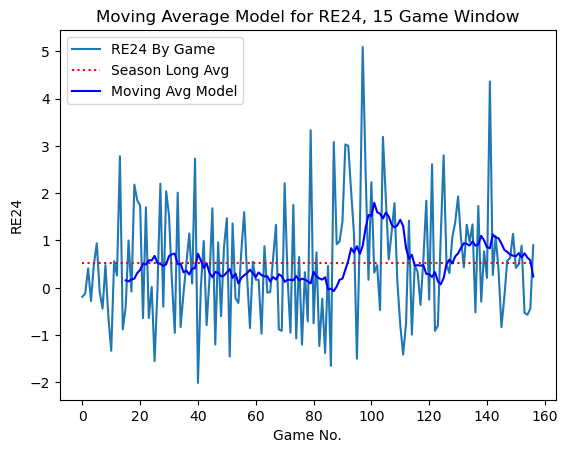

In [25]:
ma_model_15 = [0 for i in range(15,len(series))]
for i in range(15,len(series)):
    mean_est = np.mean(series[0:i])
    residuals = series[i-14:i]-mean_est
    moving_mean = np.mean(residuals)
    ma_model_15[i-15] = mean_est + moving_mean

plt.plot(series)
plt.plot([i for i in range(npts)],[avg for i in range(npts)],color='red',linestyle='dotted')
plt.plot(range(15,len(series)),ma_model_15,color='blue')
plt.title('Moving Average Model for RE24, 15 Game Window')
plt.legend(['RE24 By Game','Season Long Avg','Moving Avg Model'])
plt.xlabel('Game No.')
plt.ylabel('RE24')

Let's see how each of these models work in predicting compared to just the "mean" predictor

In [28]:
mean_model = [0 for i in range(1,len(series))]
for i in range(1,len(series)):
    mean_est = np.mean(series[0:i])
    mean_model[i-1] = mean_est 

#compute prediction MSE starting at game 16
mean_model_mse = np.sqrt(np.mean([(series[i]-mean_model[i-1])**2 for i in range(1,len(series))]))
ma5_model_mse = np.sqrt(np.mean([(series[i]-ma_model_5[i-5])**2 for i in range(5,len(series))]))
ma8_model_mse = np.sqrt(np.mean([(series[i]-ma_model_5[i-8])**2 for i in range(8,len(series))]))
ma15_model_mse = np.sqrt(np.mean([(series[i]-ma_model_15[i-15])**2 for i in range(15,len(series))]))
print('Mean Model MSE: '+str(mean_model_mse))
print('MA5 MSE: '+str(ma5_model_mse))
print('MA8 MSE: '+str(ma8_model_mse))
print('MA15 MSE: '+str(ma15_model_mse))

Mean Model MSE: 1.258020980411598
MA5 MSE: 1.3676602396977109
MA8 MSE: 1.3671986895515258
MA15 MSE: 1.3007921876549742


Text(0, 0.5, 'RE24')

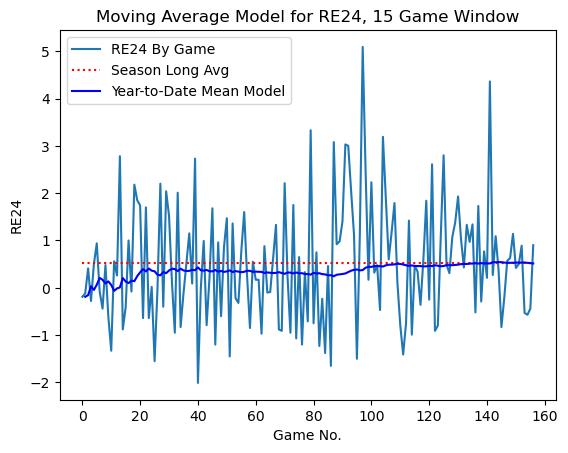

In [26]:
plt.plot(series)
plt.plot([i for i in range(npts)],[avg for i in range(npts)],color='red',linestyle='dotted')
plt.plot(range(1,len(series)),mean_model,color='blue')
plt.title('Moving Average Model for RE24, 15 Game Window')
plt.legend(['RE24 By Game','Season Long Avg','Year-to-Date Mean Model'])
plt.xlabel('Game No.')
plt.ylabel('RE24')